In [3]:
# importing packages
import sys
import pandas as pd 
import matplotlib as mpl
import numpy as np 
import scipy as sp 
#import ipython
import sklearn

# misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
# Any results you write to the current directory are saved as output.

In [4]:
# Loading Data Modeling Libraries

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBRFClassifier


# Common Model Helper
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Visualization
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# configure visualization defaults
#%matplotlib inline = show plots in Jupyter notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] =12,8


In [5]:
# importing data
data_raw = pd.read_csv('train.csv')

# a dataset should be broken into 3 splits: train, test and (final) validation
# the test file provided is the validation file for competition submission
# we will split the train set into train and test data in future sections
data_val = pd.read_csv('test.csv')

# to play with the data we'll create a copy
data1 = data_raw.copy(deep=True)
# In this case, the deep parameter is set to True, so the copy is a deep copy. 
# This means that any changes made to the copied data (data1) will not affect the original data (data_raw).

# however passing by reference is convenient, because we can clean both database at once.
data_cleaner = [data1, data_val]


# priview data
print(data_raw.info())

data_raw.sample(10) # Return a random sample of items from an axis of object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S


In [6]:
print('Train columns with null values:\n', data1.isnull().sum())
print('-'*25)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print('-'*25)

data_raw.describe(include='all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------------------------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
-------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
print(type(data_cleaner))

<class 'list'>


In [8]:
for dataset in data_cleaner:
    print(type(dataset))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [9]:
### Completing: complete or delete missing values in train and test/validation dataset 
for dataset in data_cleaner:
    # complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

    # complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

    # complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

In [10]:
# delete the cabin feature/column and others previsouly started to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace=True)

In [11]:
print(data1.isnull().sum())
print("-"*25)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
-------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [12]:
### Create: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:
    # Discrete Variables
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 # initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize']>1] = 0 # now update to no/0 if family size is greater than 1


    # quick and dirty code split tiltle 
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    # dataset['Title']=['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms','Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess','Jonkheer']

    
    # Fare Bins/Buckets using qcut or frequency bins
    # 'pandas.qcut' is used to bin the data into quantile-based bins, which means that each bin contains an equal number of data points. 
    dataset['FareBin']=pd.qcut(dataset['Fare'], 4)


    # Age Bins/Buckets using cut or value bins
    # pandas.cut is used to bin the data into bins of equal size. The size of the bins is determined by the bins parameter, 
    # which can be an integer specifying the number of bins, or a list of bin edges. 
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int),5)
   

#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 

title_names = (data1['Title'].value_counts() < stat_min)

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)

#preview data again
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFrame'>
Ra

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(64.0, 80.0]"
152,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(48.0, 64.0]"
38,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,18.0000,S,3,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
832,0,3,"Saad, Mr. Amin",male,28.0,0,0,7.2292,C,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
121,0,3,"Moore, Mr. Leonard Charles",male,28.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,1,Mr,"(31.0, 512.329]","(48.0, 64.0]"
187,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,26.5500,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]"
393,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,113.2750,C,2,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
99,0,2,"Kantor, Mr. Sinai",male,34.0,1,0,26.0000,S,2,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
53,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"


In [13]:
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB
<class 'pandas.core.frame.DataFrame'>
Ra

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
498,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,151.5500,S,4,0,Mrs,"(31.0, 512.329]","(16.0, 32.0]"
563,0,3,"Simmons, Mr. John",male,28.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
136,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,26.2833,S,3,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
674,0,2,"Watson, Mr. Ennis Hastings",male,28.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
262,0,1,"Taussig, Mr. Emil",male,52.0,1,1,79.6500,S,3,0,Mr,"(31.0, 512.329]","(48.0, 64.0]"
83,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,47.1000,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"
97,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,63.3583,C,2,0,Mr,"(31.0, 512.329]","(16.0, 32.0]"
429,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
513,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,59.4000,C,2,0,Mrs,"(31.0, 512.329]","(48.0, 64.0]"
163,0,3,"Calic, Mr. Jovo",male,17.0,0,0,8.6625,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB


In [15]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  FamilySize   418 non-null    int64   
 12  IsAlone      418 non-null    int64   
 13  Title        418 non-null    object  
 14  FareBin      418 non-null    category
 15  AgeBin       418 non-null    category
dtypes: category(2), float64(2), int64(6), object(6)
memory usage: 47.1+ KB


In [16]:
data1.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
171,0,3,"Rice, Master. Arthur",male,4.0,4,1,29.1250,Q,6,0,Master,"(14.454, 31.0]","(-0.08, 16.0]"
158,0,3,"Smiljanic, Mr. Mile",male,28.0,0,0,8.6625,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
398,0,2,"Pain, Dr. Alfred",male,23.0,0,0,10.5000,S,1,1,Misc,"(7.91, 14.454]","(16.0, 32.0]"
138,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,9.2167,S,1,1,Mr,"(7.91, 14.454]","(-0.08, 16.0]"
593,0,3,"Bourke, Miss. Mary",female,28.0,0,2,7.7500,Q,3,0,Miss,"(-0.001, 7.91]","(16.0, 32.0]"
836,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,8.6625,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
799,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,24.1500,S,3,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
612,1,3,"Murphy, Miss. Margaret Jane",female,28.0,1,0,15.5000,Q,2,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
475,0,1,"Clifford, Mr. George Quincy",male,28.0,0,0,52.0000,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"
128,1,3,"Peter, Miss. Anna",female,28.0,1,1,22.3583,C,3,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"


In [17]:
#COVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

# define y variable aka target/outcome
Target = ['Survived']

# define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] # pretty name/values for charts

data1_x_calc = ['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'Age', 'Fare'] # coded for algorithm calculation

data1_xy = Target + data1_x 
print('Original X Y:', data1_xy, '\n')

#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin 
print('Bin X Y: ', data1_xy_bin, '\n')

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y: ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [18]:
# Double check the cleaned data
print('Train colums will null values: \n', data1.isnull().sum())
print('-'*30)
print(data1.info())
print('-'*30)



Train colums will null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Em

In [19]:
print('Test/Validation colums will null values: \n', data_val.isnull().sum())
print('-'*30)
print(data_val.info())
print('-'*30)

data_raw.describe(include='all')

Test/Validation colums will null values: 
 PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilySize         0
IsAlone            0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
dtype: int64
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Name           418 non-null    object  
 3   Sex            418 non-null    object  
 4   Age            418 non-null    float64 
 5   SibSp          418 non-null    int64   
 6   Pa

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [20]:
# Split Training and Testing Data
 
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state=0)
train_x_dummy, test1_X_dummy, train1_y_test_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state=0)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [21]:
# Discrete Variable Correlation by Survival using

for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*30, '\n')

#using crosstabs 
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
------------------------------ 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------------------ 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
------------------------------ 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
------------------------------ 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------------------------------ 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000

In [22]:
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survived    0    1
Title             
Master     17   23
Misc       15   12
Miss       55  127
Mr        436   81
Mrs        26   99


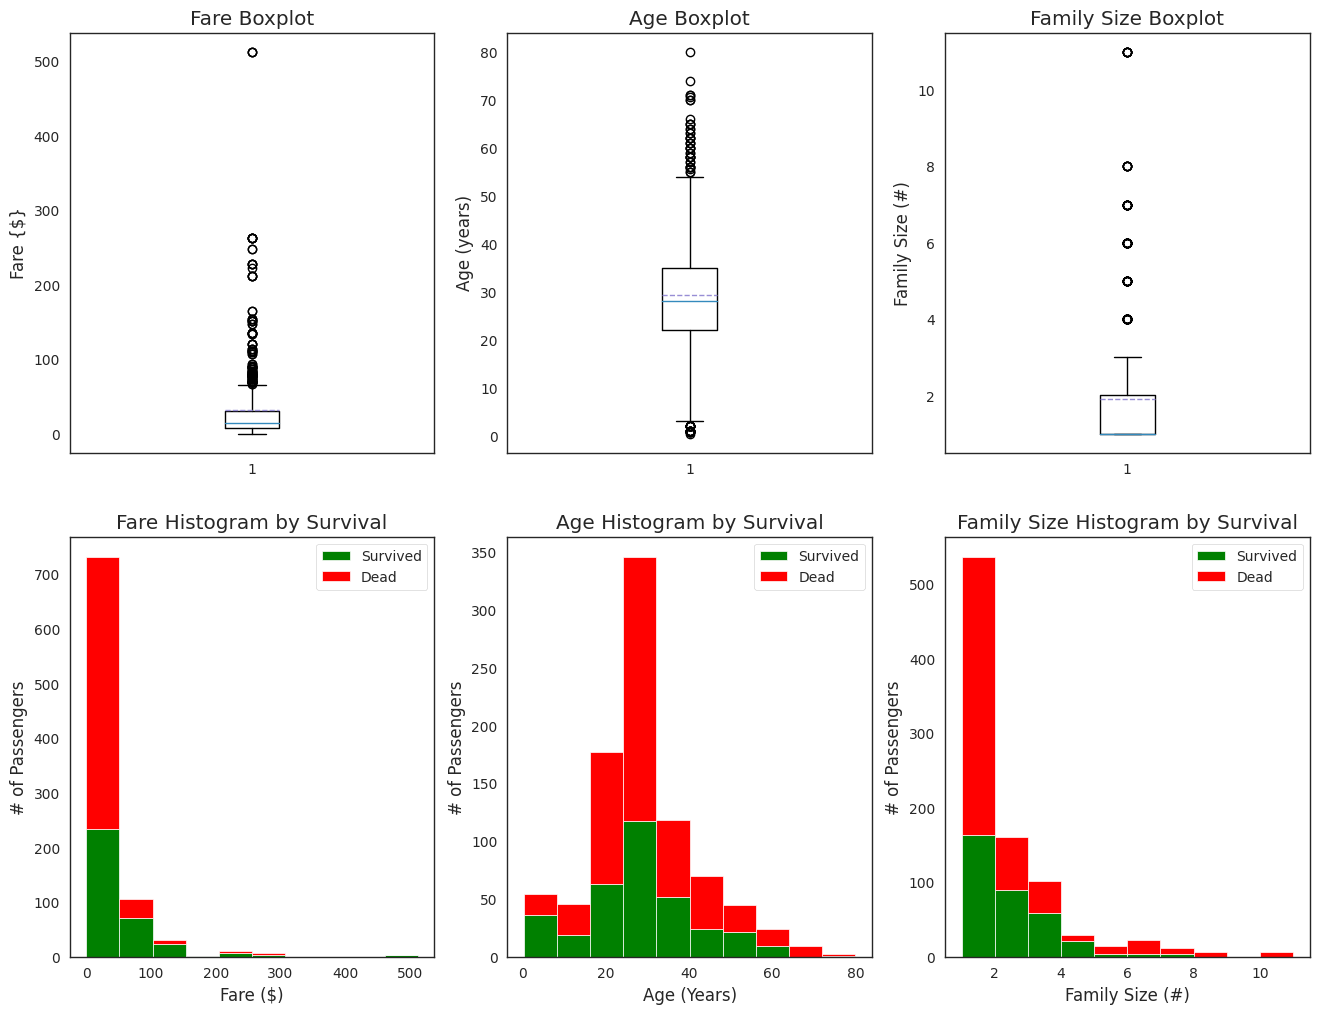

In [23]:
# graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare {$}')
plt.subplot(232)
plt.boxplot(data1['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (years)')
plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans=True, meanline=True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')
plt.subplot(234)
plt.hist(x=[data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], stacked=True, color=['g','r'], label=['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()
plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

<AxesSubplot: xlabel='FamilySize', ylabel='Survived'>

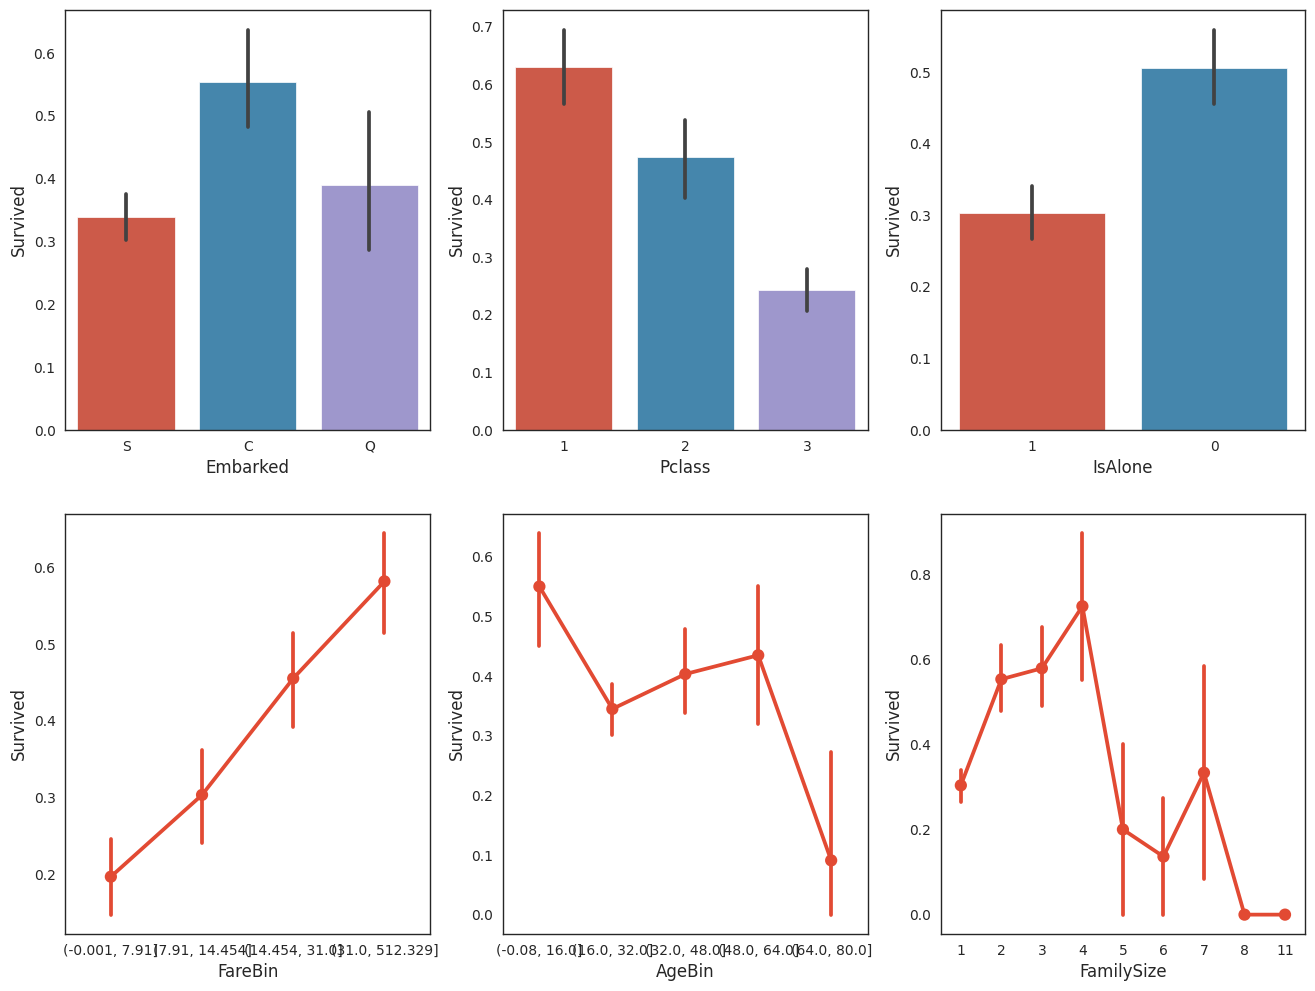

In [24]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 3, figsize=(16,12))

sns.barplot(x='Embarked', y='Survived', data=data1, ax=saxis[0,0])
sns.barplot(x='Pclass', y='Survived', order=[1,2,3], data=data1, ax=saxis[0,1])
sns.barplot(x='IsAlone', y='Survived', order=[1,0], data=data1, ax=saxis[0,2])

sns.pointplot(x='FareBin', y='Survived', data=data1, ax=saxis[1,0])
sns.pointplot(x='AgeBin', y='Survived', data=data1, ax=saxis[1,1])
sns.pointplot(x='FamilySize', y='Survived', data=data1, ax=saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

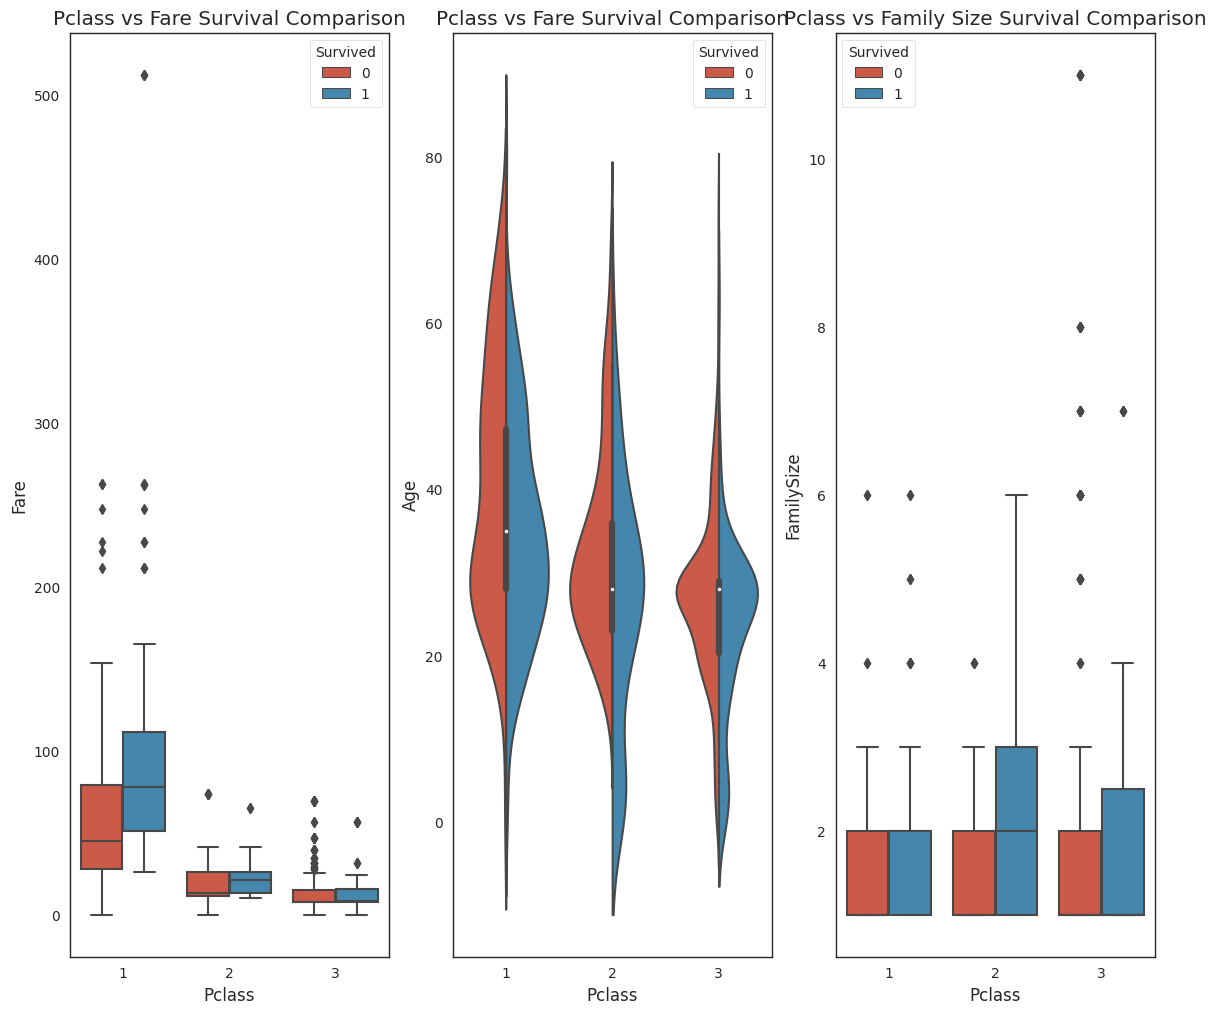

In [25]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data1, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data1, split=True, ax=axis2)
axis2.set_title('Pclass vs Fare Survival Comparison')

sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=data1, ax=axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

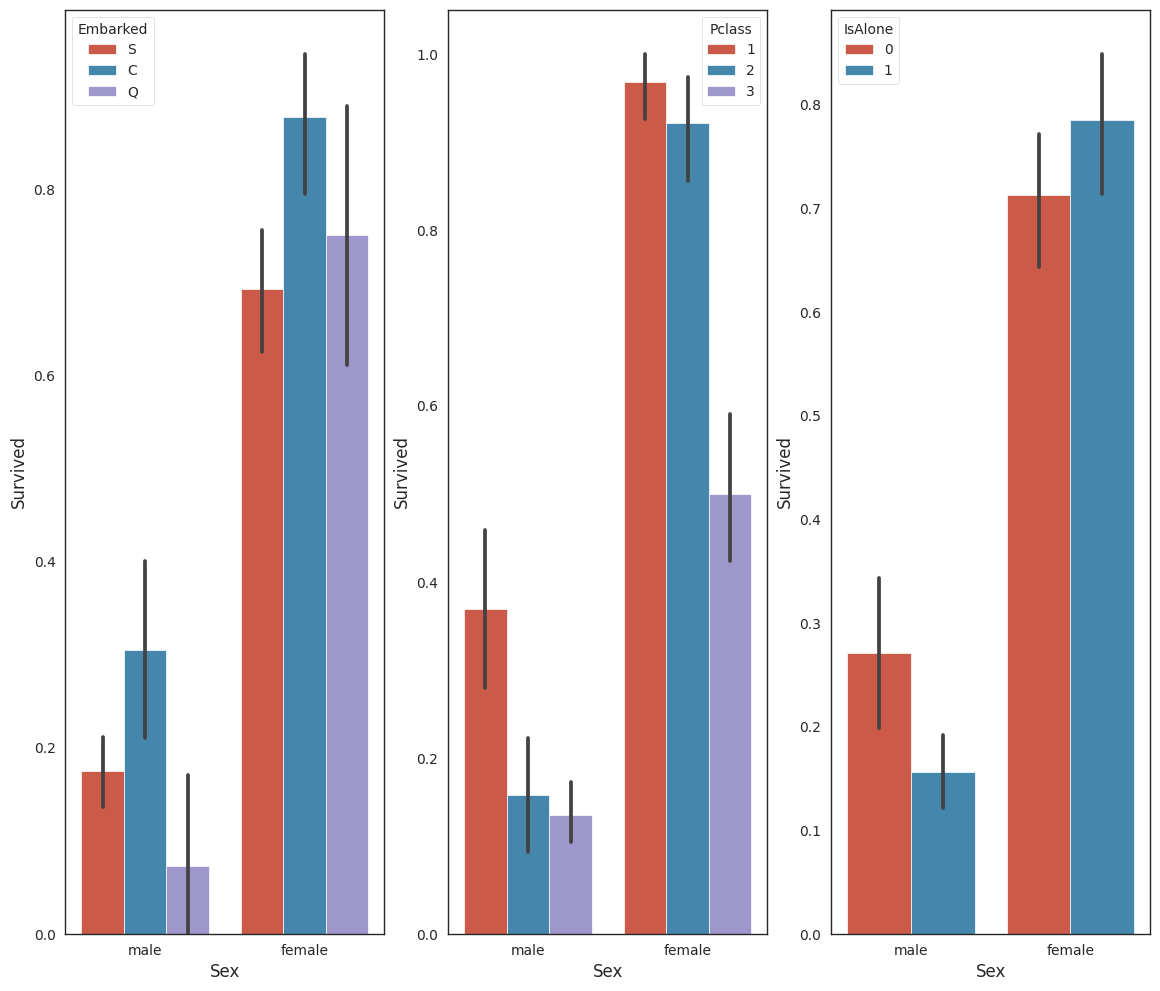

In [26]:
# graph distribution of qualitative data:sex
# we know sex mattered in survival, now let's compare sex and a 2nd feature

fig, qaxis = plt.subplots(1, 3, figsize=(14, 12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax=qaxis[0])
axis1.set_title('Sex vs Emabarked Survival Comparison')

sns.barplot(x ='Sex', y = 'Survived', hue = 'Pclass', data=data1, ax=qaxis[1])
axis1.set_title('Sex Vs Pclass Survival Comparison')

sns.barplot(x='Sex', y ='Survived', hue='IsAlone', data=data1, ax=qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

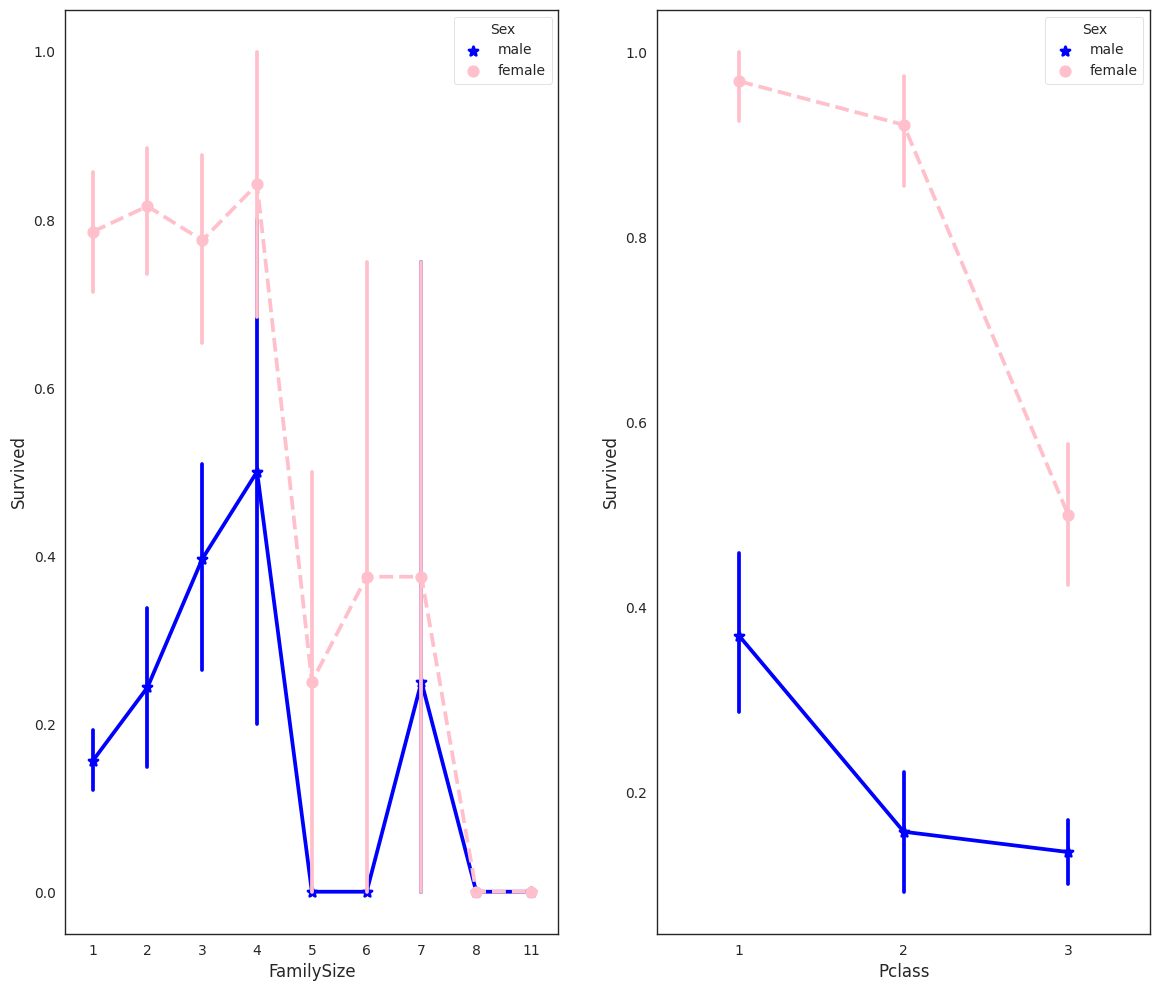

In [27]:
# more side-by-side camparison
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize=(14,12))

# how does family size factor with sex & survival campare
sns.pointplot(x="FamilySize", y='Survived', hue='Sex', data=data1, palette={"male":"blue", 'female':'pink'},
                markers=["*","o"], linestyles=["-","--"], ax=maxis1)

# how does class factor with sex & survival campare
sns.pointplot(x='Pclass', y="Survived", hue='Sex', data=data1, 
                palette={'male':'blue', 'female':'pink'}, 
                markers=["*","o"], linestyles=["-","--"], ax=maxis2)

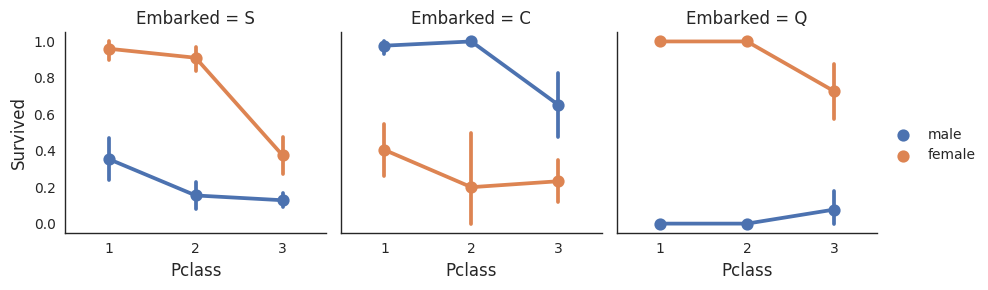

In [28]:
# how does embark pork factor with class, sex and survival compare
e = sns.FacetGrid(data1, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette='deep')
e.add_legend()


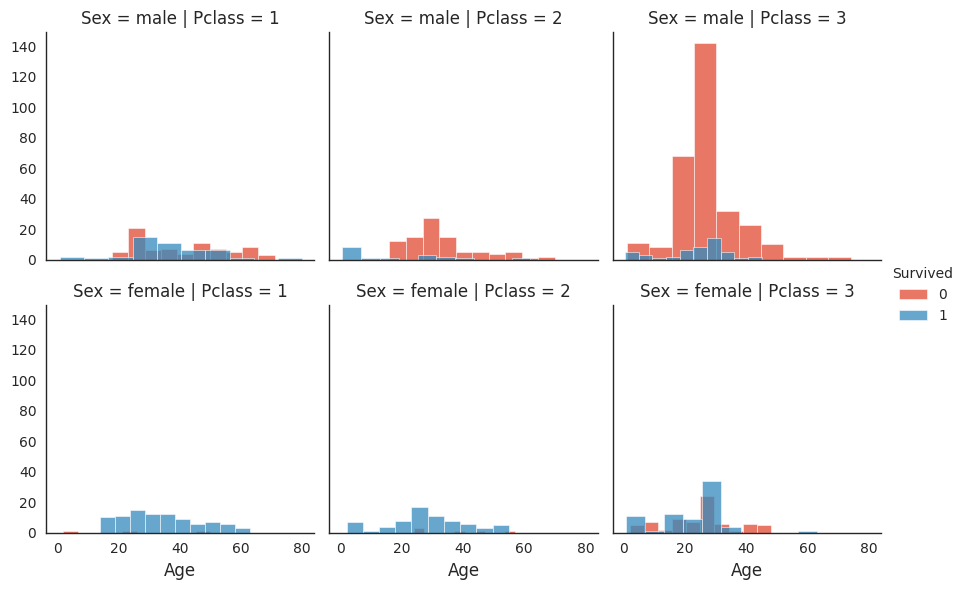

In [29]:
# histogram comparison of sex, class and age by survival
h = sns.FacetGrid(data1, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

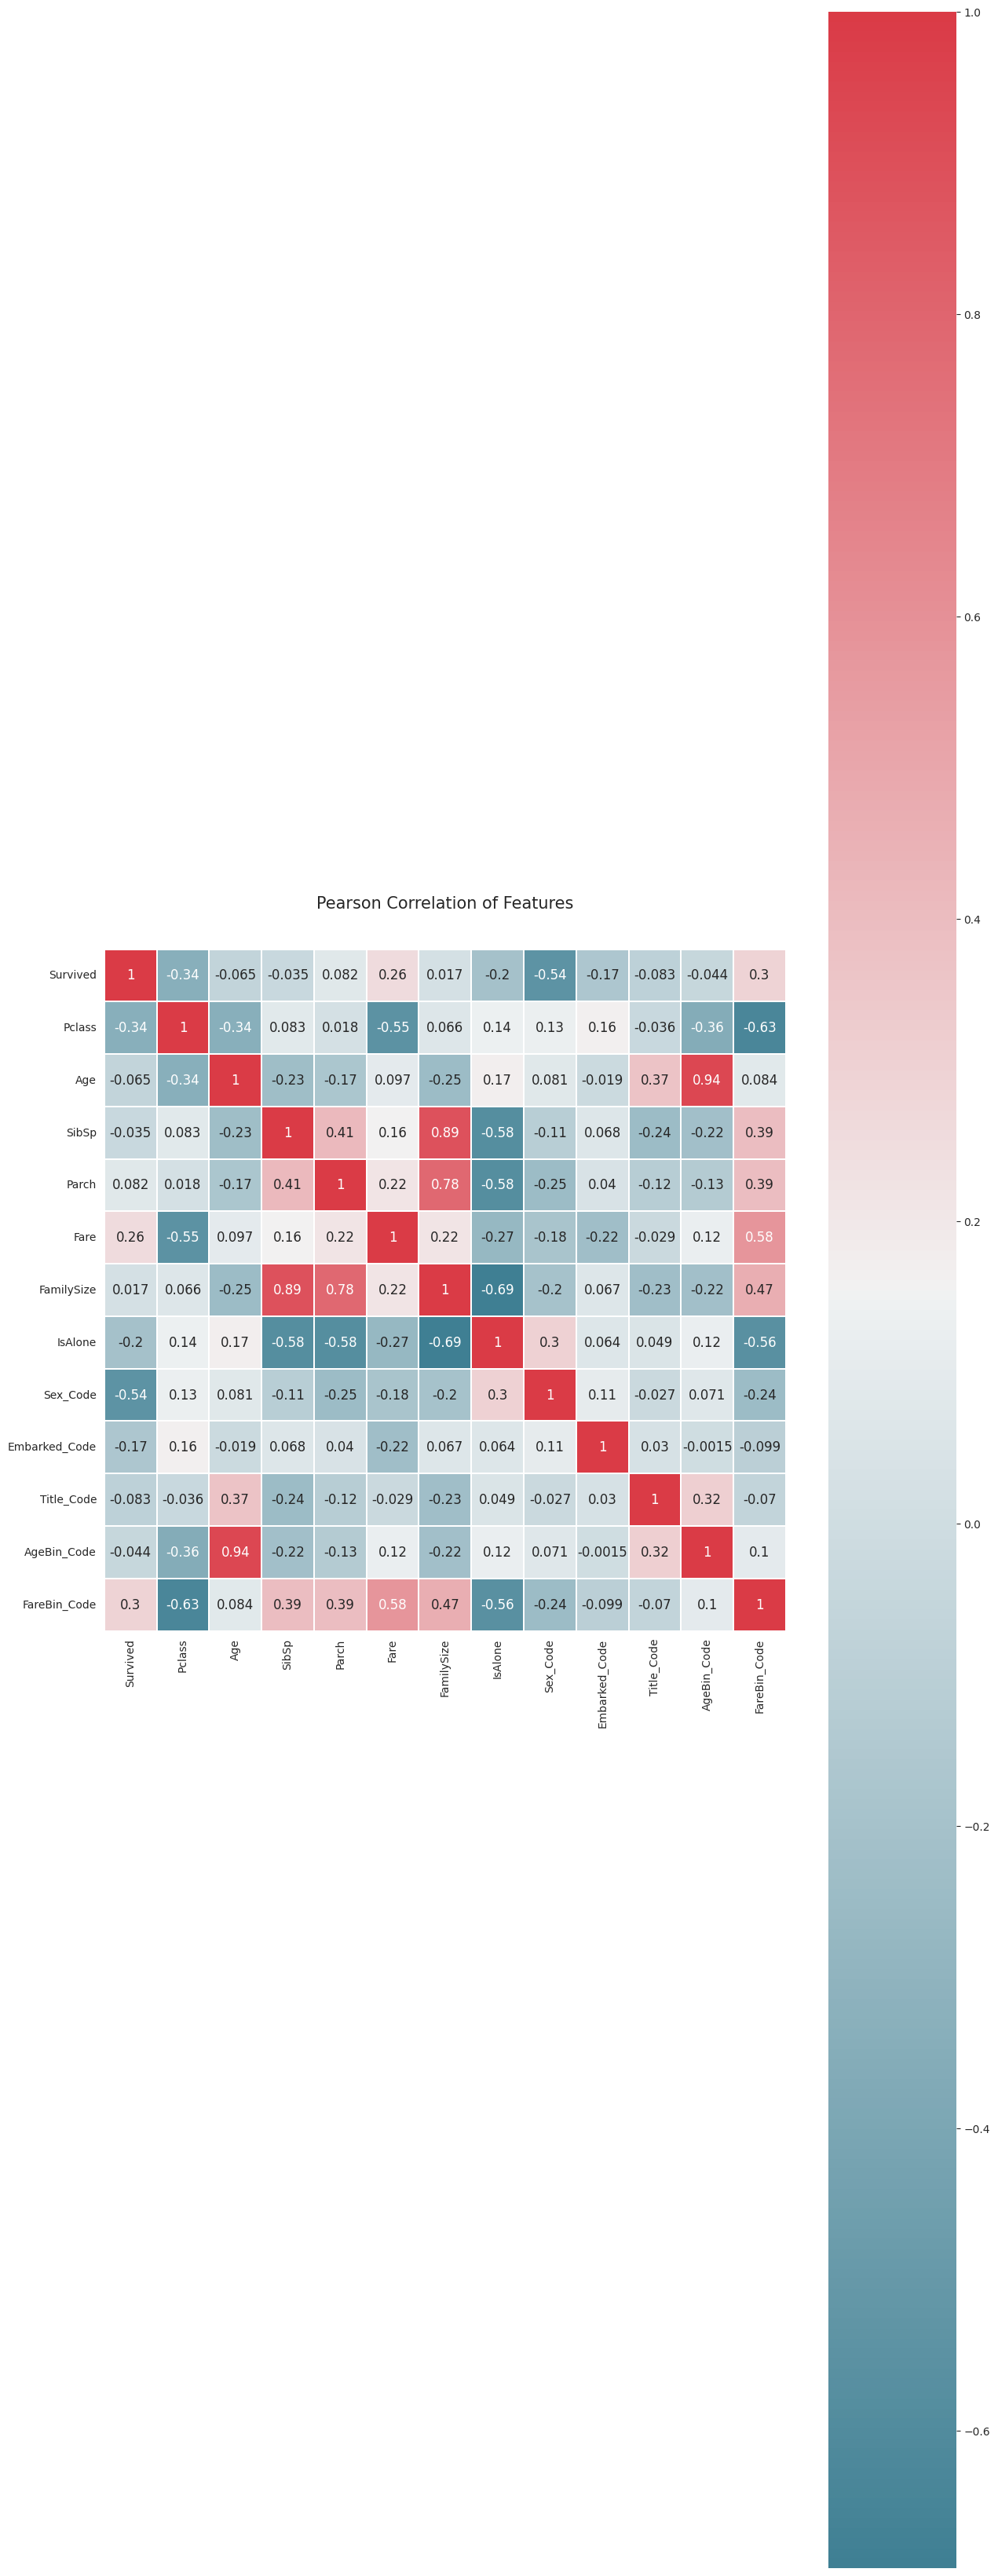

In [30]:
# Correlation heatmap of dataset

def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(14,12))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    _ = sns.heatmap(
        df.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={'shrink':9},
        ax=ax,
        annot=True,
        linewidths=0.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12}
    
    )
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [ ]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBRFClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split,scoring=['train_score'])

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

# <font color='#dd9ac2'>**5.1 Evaluate Model Performance**</font>
Let's recap, with some basic data cleaning, analysis, and machine learning algorithms (MLA), we are able to predict passenger survival with ~82% accuracy. Not bad for a few lines of code. But the question we always ask is, can we do better and more importantly get an ROI (return on investment) for our time invested? For example, if we're only going to increase our accuracy by 1/10th of a percent, is it really worth 3-months of development. If you work in research maybe the answer is yes, but if you work in business mostly the answer is no. So, keep that in mind when improving your model.

## <font color='#dd9ac2'>**Data Science 101: Determine a Baseline Accuracy** </font>
Before we decide how-to make our model better, let's determine if our model is even worth keeping. To do that, we have to go back to the basics of data science 101. We know this is a binary problem, because there are only two possible outcomes; passengers survived or died. So, think of it like a coin flip problem. If you have a fair coin and you guessed heads or tail, then you have a 50-50 chance of guessing correct. So, let's set 50% as the worst model performance; because anything lower than that, then why do I need you when I can just flip a coin?

Okay, so with no information about the dataset, we can always get 50% with a binary problem. But we have information about the dataset, so we should be able to do better. We know that 1,502/2,224 or 67.5% of people died. Therefore, if we just predict the most frequent occurrence, that 100% of people died, then we would be right 67.5% of the time. So, let's set 68% as bad model performance, because again, anything lower than that, then why do I need you, when I can just predict using the most frequent occurrence.

## <font color='#dd9ac2'>**Data Science 101: How-to Create Your Own Model**</font>
Our accuracy is increasing, but can we do better? Are there any signals in our data? To illustrate this, we're going to build our own decision tree model, because it is the easiest to conceptualize and requires simple addition and multiplication calculations. When creating a decision tree, you want to ask questions that segment your target response, placing the survived/1 and dead/0 into homogeneous subgroups. This is part science and part art, so let's just play the 21-question game to show you how it works. If you want to follow along on your own, download the train dataset and import into Excel. Create a pivot table with survival in the columns, count and % of row count in the values, and the features described below in the rows.

Remember, the name of the game is to create subgroups using a decision tree model to get survived/1 in one bucket and dead/0 in another bucket. Our rule of thumb will be the majority rules. Meaning, if the majority or 50% or more survived, then everybody in our subgroup survived/1, but if 50% or less survived then if everybody in our subgroup died/0. Also, we will stop if the subgroup is less than 10 and/or our model accuracy plateaus or decreases. Got it? Let's go!

<font color='#747DFA'>**Question 1:**</font> Were you on the Titanic? If Yes, then majority (62%) died. Note our sample survival is different than our population of 68%. Nonetheless, if we assumed everybody died, our sample accuracy is 62%.

<font color='#747DFA'>**Question 2:**</font>Are you male or female? Male, majority (81%) died. Female, majority (74%) survived. Giving us an accuracy of 79%.

<font color='#747DFA'>**Question 3A (going down the female branch with count = 314):**</font> Are you in class 1, 2, or 3? Class 1, majority (97%) survived and Class 2, majority (92%) survived. Since the dead subgroup is less than 10, we will stop going down this branch. Class 3, is even at a 50-50 split. No new information to improve our model is gained.

<font color='#747DFA'>**Question 4A (going down the female class 3 branch with count = 144):**</font> Did you embark from port C, Q, or S? We gain a little information. C and Q, the majority still survived, so no change. Also, the dead subgroup is less than 10, so we will stop. S, the majority (63%) died. So, we will change females, class 3, embarked S from assuming they survived, to assuming they died. Our model accuracy increases to 81%.

<font color='#747DFA'>**Question 5A (going down the female class 3 embarked S branch with count = 88):** </font>So far, it looks like we made good decisions. Adding another level does not seem to gain much more information. This subgroup 55 died and 33 survived, since majority died we need to find a signal to identify the 33 or a subgroup to change them from dead to survived and improve our model accuracy. We can play with our features. One I found was fare 0-8, majority survived. It's a small sample size 11-9, but one often used in statistics. We slightly improve our accuracy, but not much to move us past 82%. So, we'll stop here.

<font color='#747DFA'>**Question 3B (going down the male branch with count = 577):**</font> Going back to question 2, we know the majority of males died. So, we are looking for a feature that identifies a subgroup that majority survived. Surprisingly, class or even embarked didn't matter like it did for females, but title does and gets us to 82%. Guess and checking other features, none seem to push us past 82%. So, we'll stop here for now.

You did it, with very little information, we get to 82% accuracy. On a worst, bad, good, better, and best scale, we'll set 82% to good, since it's a simple model that yields us decent results. But the question still remains, can we do better than our handmade model?

Before we do, let's code what we just wrote above. Please note, this is a manual process created by "hand." You won't have to do this, but it's important to understand it before you start working with MLA. Think of MLA like a TI-89 calculator on a Calculus Exam. It's very powerful and helps you with a lot of the grunt work. But if you don't know what you're doing on the exam, a calculator, even a TI-89, is not going to help you pass. So, study the next section wisely.

In [45]:
#iterate over dataFrame rows as (index, Series) pairs:

for index, row in data1.iterrows():
    # random number generator
    if random.random() > .5: # Random float x, 0.0 <= x < 1.0
        data1.at[index, 'Random_Predict'] = 1 # predict survived/1
    else:
        data1.at[index, "Random_Predict"] = 0 # predict died/0


# score random guess of survival. Use shortcut 1 = Right Guess and 0 = Wrong Guess
# the mean of the column will then equal the accuary
data1['Random_score'] = 0 # assume prediction wrong
data1.loc[(data1['Survived'] == data1['Random_Predict']), 'Random_score'] = 1 #set to 1 for correct prediction
print('Coin Flip model Accuracy: {:.2f}%'.format(data1['Random_score'].mean()*100))

# we can use scikit's accuracy_score function to save us a few lines of code
print("Coin Flip Model Accuracy w/Scikit:{:.2f}%".format(metrics.accuracy_score(data1['Survived'],data1["Random_Predict"])*100)) 

Coin Flip model Accuracy: 51.18%
Coin Flip Model Accuracy w/Scikit:51.18%


In [47]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title', 'FareBin', 'AgeBin',
       'Sex_Code', 'Embarked_Code', 'Title_Code', 'AgeBin_Code',
       'FareBin_Code', 'Random_Predict', 'Random_score'],
      dtype='object')

In [57]:
pivot_female = data1[data1.Sex == "female"].groupby(['Sex', 'Pclass', 'Embarked','FareBin'])['Survived'].mean()
print('Survival Decision Tress w/Female Node: \n', pivot_female)


Survival Decision Tress w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]          NaN
                          (31.0, 512.329]    1.000000
                S         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN

In [60]:
pivot_male = data1[data1.Sex == "male"].groupby(['Sex', 'Title'])['Survived'].mean()
print('Survival Decision Tress w/Male Node: \n', pivot_male)

Survival Decision Tress w/Male Node: 
 Sex   Title 
male  Master    0.575000
      Misc      0.250000
      Mr        0.156673
Name: Survived, dtype: float64


In [66]:
def mytree(df):
    
    #initialize table to store predictions
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] #survived titles

    for index, row in df.iterrows():

        #Question 1: Were you on the Titanic; majority died
        Model.loc[index, 'Predict'] = 0

        #Question 2: Are you female; majority survived
        if (df.loc[index, 'Sex'] == 'female'):
                  Model.loc[index, 'Predict'] = 1

        #Question 3A Female - Class and Question 4 Embarked gain minimum information

        #Question 5B Female - FareBin; set anything less than .5 in female node decision tree back to 0       
        if ((df.loc[index, 'Sex'] == 'female') & 
            (df.loc[index, 'Pclass'] == 3) & 
            (df.loc[index, 'Embarked'] == 'S')  &
            (df.loc[index, 'Fare'] > 8)

           ):
                  Model.loc[index, 'Predict'] = 0

        #Question 3B Male: Title; set anything greater than .5 to 1 for majority survived
        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] in male_title)
            ):
            Model.loc[index, 'Predict'] = 1
        
        
    return Model


#model data
Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data1['Survived'], Tree_Predict)*100))


print(metrics.classification_report(data1['Survived'], Tree_Predict))

Decision Tree Model Accuracy/Precision Score: 82.04%

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.82       891



Confusion matrix, without normalization
[[497  52]
 [108 234]]
Normalized confusion matrix
[[0.91 0.09]
 [0.32 0.68]]


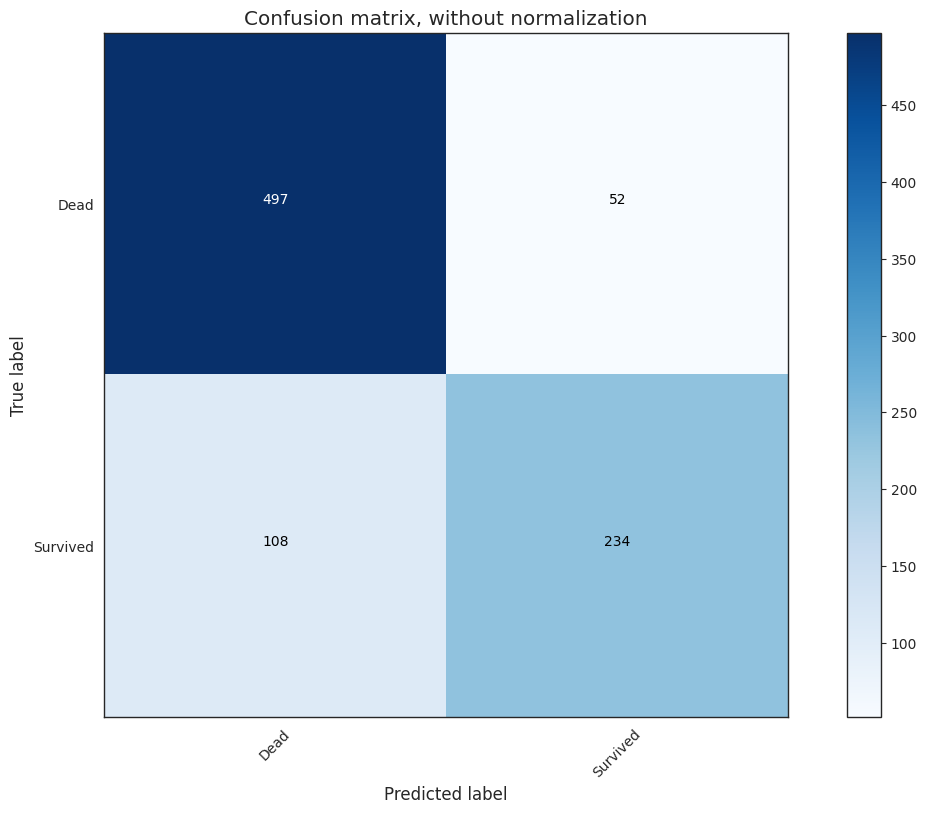

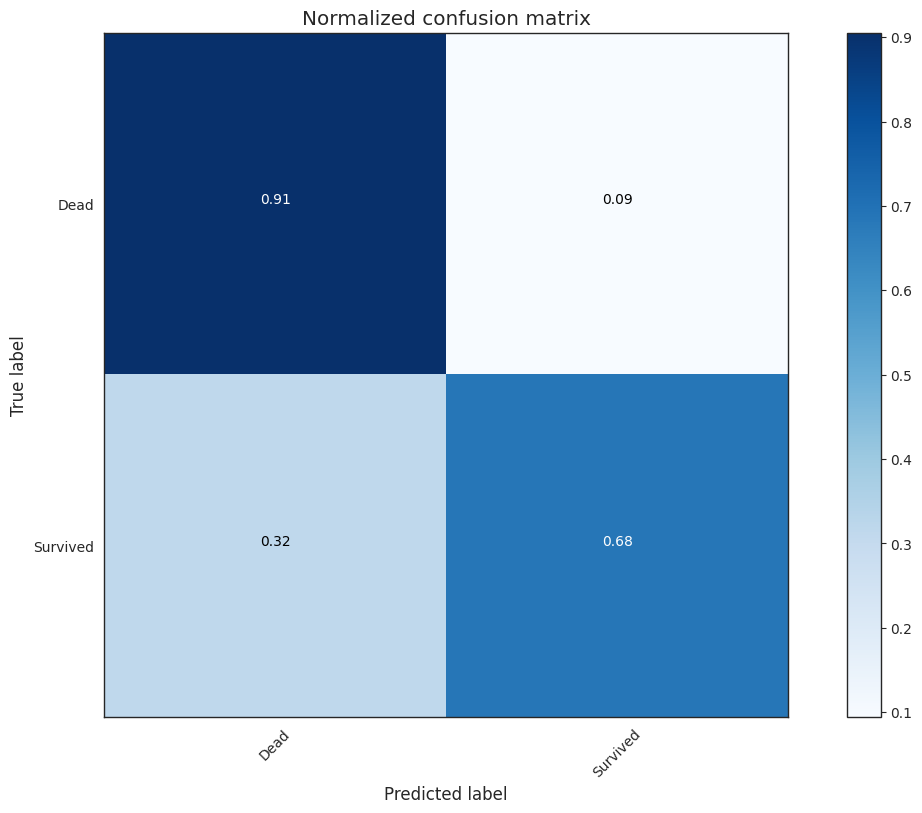

In [67]:
#Plot Accuracy Summary
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

In [ ]:
#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv  = cv_split)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

#print(list(model_selection.ParameterGrid(param_grid)))

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(data1[data1_x_bin], data1[Target])

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


#duplicates gridsearchcv
#tune_results = model_selection.cross_validate(tune_model, data1[data1_x_bin], data1[Target], cv  = cv_split)

#print('AFTER DT Parameters: ', tune_model.best_params_)
#print("AFTER DT Training w/bin set score mean: {:.2f}". format(tune_results['train_score'].mean()*100)) 
#print("AFTER DT Test w/bin set score mean: {:.2f}". format(tune_results['test_score'].mean()*100))
#print("AFTER DT Test w/bin set score min: {:.2f}". format(tune_results['test_score'].min()*100))
#print('-'*10)